# Tugas Supervised Learning 
# Kecerdasan Buatan 2023/2024

Berikut adalah contoh aplikasi supervised learning untuk melakukan klasifikasi pada sebuah Dataset

Beberapa library yang harus diinstal dan disiapkan
1. Sklearn (pip install scikit-learn)
2. Pandas
3. Numpy
4. Matplotlib

====================================================================================================

### Import beberapa library yang akan kita gunakan

In [1]:
!pip install scikit-learn pandas numpy matplotlib ucimlrepo

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score

### Download dataset dan import kedalam code 

Dataset yang kita gunakan adalah dataset hepatitis dari https://archive.ics.uci.edu/dataset/46/hepatitis

In [21]:
# Mengunduh dan mengimpor dataset hepatitis
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
column_names = [
    'Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
    'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
    'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'
]

df = pd.read_csv(url, names=column_names)

### Preview dataset yang sudah kalian download 

In [22]:
#code untuk preview fitur fitur yang digunakan (clue:.head())
#code untuk preview target yang mau diklasifikasikan berdasarkan apa saja


# Preview fitur-fitur yang digunakan
print("Preview Fitur-Fitur:")
print(df.head())

# Preview target yang mau diklasifikasikan berdasarkan apa saja
print("\nPreview Target:")
print(df['Class'].head())

Preview Fitur-Fitur:
   Class  AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0      2   30    2       1           2       2       2        2         1   
1      2   50    1       1           2       1       2        2         1   
2      2   78    1       2           2       1       2        2         2   
3      2   31    1       ?           1       2       2        2         2   
4      2   34    1       2           2       2       2        2         2   

  LIVER FIRM SPLEEN PALPABLE SPIDERS ASCITES VARICES BILIRUBIN ALK PHOSPHATE  \
0          2               2       2       2       2      1.00            85   
1          2               2       2       2       2      0.90           135   
2          2               2       2       2       2      0.70            96   
3          2               2       2       2       2      0.70            46   
4          2               2       2       2       2      1.00             ?   

  SGOT ALBUMIN PROTIME  HISTOLOGY  

### Data Preprocessing

Data processing sangat penting sekali dilakukan karena untuk mencari dan menganalisa data apakah ada terdapat data yang belum bersih. Maksud dari belum bersih adalah terdapat data yang hilang, NaN, Null, dll. Sebelum di proses lebih lanjut data harus sudah bersih

In [23]:
#code untuk preprocessing (clue: (Data Cleaning) cek apakah terdapat data yang hilang, Nan, atau Null. 
#Jika ada drop data tersebut by row atau by kolom. Silahkan dianalisa jika by row seperti apa dan by kolom seperti apa)

# Mengecek apakah terdapat data yang hilang, NaN, atau Null
print("\nCek Missing Values:")
print(df.isnull().sum())

# Mengganti '?' dengan NaN dan mengubah tipe data ke float
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)

# Drop baris yang memiliki nilai NaN
df.dropna(inplace=True)

print("\nSetelah Data Cleaning:")
print(df.isnull().sum())
print(df.head())


Cek Missing Values:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

Setelah Data Cleaning:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64
    Class  AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
5       2   34   

### Lakukan Split data menjadi train dan test

Split data merupakan tahap penting dalam supervised learning. Karena algoritma nanti akan mempelajari data pada data train dan menguji hasil belajarnya pada data test

In [24]:
#Code untuk splitting dataset

# Memisahkan fitur dan target
X = df.drop(columns=['Class'])
y = df['Class']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of Training and Testing Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shape of Training and Testing Data:
X_train shape: (64, 19)
X_test shape: (16, 19)
y_train shape: (64,)
y_test shape: (16,)


====================================================================================================

### Proses Learning dengan Algoritma Supervised Learning

Pada tugas ini kita akan menggunakan 2 algoritma
1. KNN
2. Naive Bayes

### Algoritma KNN

In [25]:
# code panggil fungsi KNN pada library sklearn
# code masukkan datatrain pada KNN dan jalankan proses learningnya


# Import library KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN dengan jumlah tetangga = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Melakukan training model KNN dengan data training
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Uji hasil Learning KNN


KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         2
           2       0.88      1.00      0.93        14

    accuracy                           0.88        16
   macro avg       0.94      0.50      0.47        16
weighted avg       0.89      0.88      0.82        16



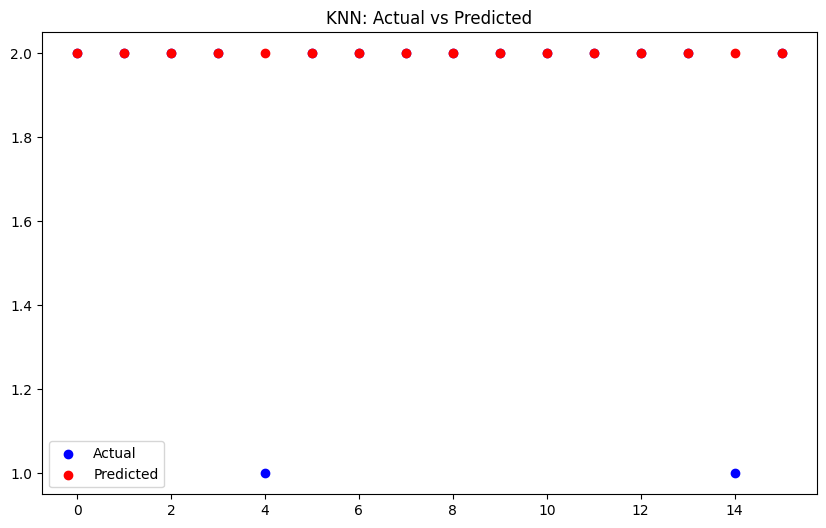

In [26]:
# code untuk pengujian hasil learning menggunakan KNN pada Datatest
# code hasil output
# code visualisasi hasil output dengan membandingkan data aktual dengan data hasil klasifikasi

# Melakukan prediksi menggunakan data testing
y_pred_knn = knn.predict(X_test)

# Hasil output
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

# Visualisasi hasil output dengan membandingkan data aktual dengan data hasil klasifikasi
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', label='Predicted')
plt.title('KNN: Actual vs Predicted')
plt.legend()
plt.show()

### Algoritma Naive Bayes

In [27]:
# code panggil fungsi Naive Bayes pada library sklearn
# code masukkan datatrain pada KNN dan jalankan proses learningnya

# Import library GaussianNB
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Melakukan training model Naive Bayes dengan data training
nb.fit(X_train, y_train)

GaussianNB()

### Uji hasil Learning Naive Bayes


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.92      0.86      0.89        14

    accuracy                           0.81        16
   macro avg       0.63      0.68      0.64        16
weighted avg       0.85      0.81      0.83        16



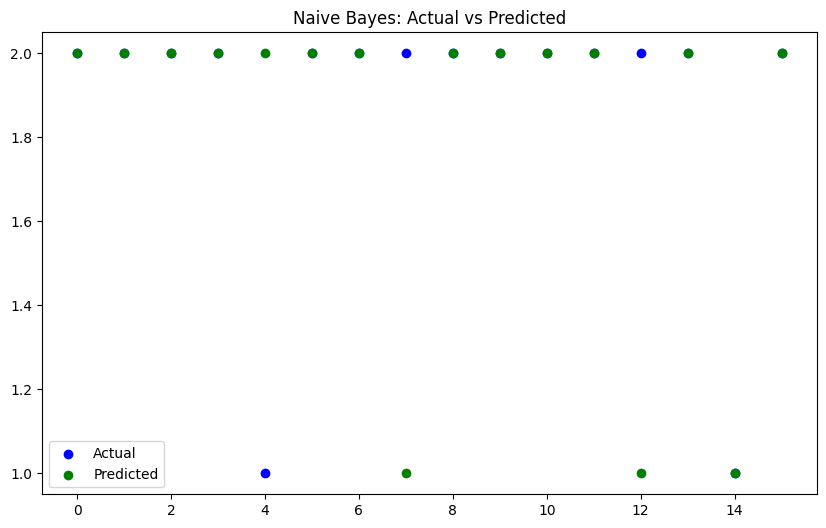

In [28]:
# code untuk pengujian hasil learning menggunakan Naive Bayes pada Datatest
# code hasil output
# code visualisasi hasil output dengan membandingkan data aktual dengan data hasil klasifikasi


# Melakukan prediksi menggunakan data testing
y_pred_nb = nb.predict(X_test)

# Menampilkan laporan klasifikasi untuk hasil prediksi Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=1))

# Visualisasi hasil output dengan membandingkan data aktual dengan data hasil klasifikasi
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_nb)), y_pred_nb, color='green', label='Predicted')
plt.title('Naive Bayes: Actual vs Predicted')
plt.legend()
plt.show()

====================================================================================================

## Pengujian

Setelah kita membuat model klasifikasi dengan menggunakan algoritma KNN dan Naive Bayes, hal selanjutnya yaitu kita perlu menguji algoritma mana yang paling baik di antara 2 algoritma tersebut. Metrics atau satuan pengukuran yang akan kita gunakan adalah Accuracy dan Precision

### Hitung nilai akurasi dan presisi dari model KNN

In [29]:
# code untuk menghitung akurasi 
# code untuk menghitung presisi

# Hitung nilai akurasi dan presisi dari model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=1)

print("\nKNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)


KNN Accuracy: 0.875
KNN Precision: 0.9375


### Hitung nilai akurasi dan presisi dari model Naive Bayes

In [30]:
# code untuk menghitung akurasi 
# code untuk menghitung presisi

# Hitung nilai akurasi dan presisi dari model Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro', zero_division=1)

print("\nNaive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Precision:", precision_nb)


Naive Bayes Accuracy: 0.8125
Naive Bayes Precision: 0.6282051282051282


====================================================================================================

# Kesimpulan

Dari apa yang telah kalian lakukan dapat disimpulkan dengan menjawab beberapa pertanyaan berikut:
1. Mengapa dataset perlu dilakukan tahap preprocessing?
2. Mengapa dataset perlu dilakukan splitting?
3. Bagaimana konsep dan cara kerja dari KNN dan Naive Bayes?
4. Pada hasil pengujian manakan yang paling baik antara KNN dengan Naive Bayes pada dataset ini?
5. Apa perbedaan dari akurasi dan presisi?

### Mengapa dataset perlu dilakukan tahap preprocessing?

Tahap preprocessing sangat penting untuk memastikan data bersih dan siap untuk digunakan dalam model machine learning. Preprocessing melibatkan:

1. Mengatasi nilai yang hilang (missing values), NaN, atau null.
2. Mengubah format data agar konsisten.
3. Normalisasi atau standarisasi data.

In [31]:
# Code untuk preprocessing DATA

# Mengecek apakah terdapat data yang hilang, NaN, atau Null
print("\nCek Missing Values:")
print(df.isnull().sum())

# Mengganti '?' dengan NaN dan mengubah tipe data ke float
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)

# Drop baris yang memiliki nilai NaN
df.dropna(inplace=True)

print("\nSetelah Data Cleaning:")
print(df.isnull().sum())
print(df.head())


Cek Missing Values:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

Setelah Data Cleaning:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64
    Class  AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
5       2   34   

### Mengapa dataset perlu dilakukan splitting?

Splitting dataset menjadi training dan testing set sangat penting untuk mengevaluasi kinerja model. Hal ini memungkinkan:

1. Pelatihan model pada data training.
2. Pengujian kinerja model pada data yang belum pernah dilihat (data testing) untuk mengukur kemampuan generalisasi model.

In [32]:
# Code untuk splitting dataset

# Memisahkan fitur dan target
X = df.drop(columns=['Class'])
y = df['Class']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of Training and Testing Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shape of Training and Testing Data:
X_train shape: (64, 19)
X_test shape: (16, 19)
y_train shape: (64,)
y_test shape: (16,)


### Bagaimana konsep dan cara kerja dari KNN dan Naive Bayes?

KNN (K-Nearest Neighbors): KNN adalah algoritma yang mengklasifikasikan data baru berdasarkan kemiripannya dengan data tetangga terdekat. Prosesnya melibatkan:

1. Menghitung jarak antara data baru dengan semua data di training set.
2. Memilih k tetangga terdekat.
3. Menentukan kelas berdasarkan mayoritas tetangga terdekat.

Naive Bayes: Naive Bayes adalah algoritma yang didasarkan pada Teorema Bayes dengan asumsi bahwa fitur-fitur bersifat independen. Prosesnya melibatkan:

1. Menghitung probabilitas dari setiap kelas berdasarkan fitur.
2. Menggunakan teorema Bayes untuk mengkombinasikan probabilitas tersebut.
3. Memilih kelas dengan probabilitas tertinggi sebagai prediksi.

In [15]:
# Code untuk KNN dan Naive Bayes:

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

Preview Fitur-Fitur:
   Class  AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0      2   30    2       1           2       2       2        2         1   
1      2   50    1       1           2       1       2        2         1   
2      2   78    1       2           2       1       2        2         2   
3      2   31    1       ?           1       2       2        2         2   
4      2   34    1       2           2       2       2        2         2   

  LIVER FIRM SPLEEN PALPABLE SPIDERS ASCITES VARICES BILIRUBIN ALK PHOSPHATE  \
0          2               2       2       2       2      1.00            85   
1          2               2       2       2       2      0.90           135   
2          2               2       2       2       2      0.70            96   
3          2               2       2       2       2      0.70            46   
4          2               2       2       2       2      1.00             ?   

  SGOT ALBUMIN PROTIME  HISTOLOGY  

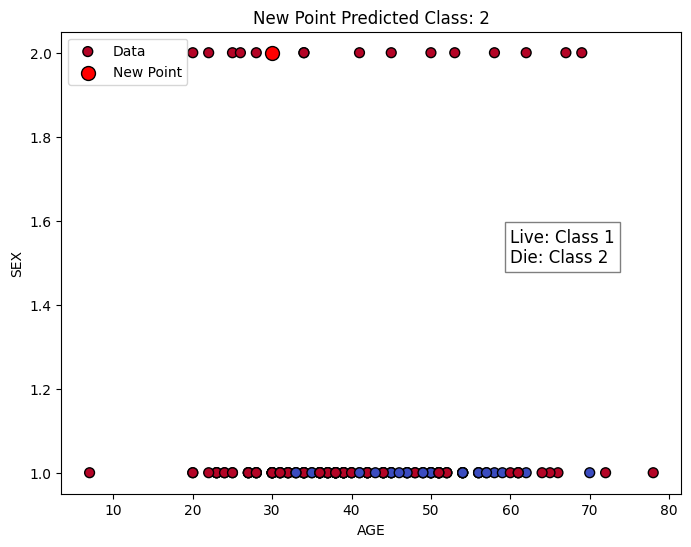

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Mengunduh dan mengimpor dataset hepatitis
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
column_names = [
    'Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
    'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
    'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'
]

df = pd.read_csv(url, names=column_names)

# Menampilkan informasi dataset
print("Preview Fitur-Fitur:")
print(df.head())

# Data baru untuk diklasifikasikan (ambil satu contoh data dari dataset)
new_point = df.iloc[0:1, 1:3].values  # Ambil AGE dan SEX sebagai contoh fitur baru
print("\nData Baru untuk Diklasifikasikan:")
print(new_point)

# Inisialisasi dan fit model KNN
X = df[['AGE', 'SEX']].values
y = df['Class'].values

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Prediksi kelas untuk data baru
new_class = knn.predict(new_point)
print(f'\nNew Point Predicted Class: {new_class[0]}')

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label='Data')

# Plot data baru
plt.scatter(new_point[:, 0], new_point[:, 1], c='red', s=100, edgecolors='k', label='New Point')

# Tambahkan legenda
plt.legend()

# Tambahkan penjelasan warna
plt.text(60, 1.5, 'Live: Class 1\nDie: Class 2', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('AGE')
plt.ylabel('SEX')
plt.title(f'New Point Predicted Class: {new_class[0]}')
plt.show()

C:\Users\bayua\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bayua\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bayua\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bayua\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

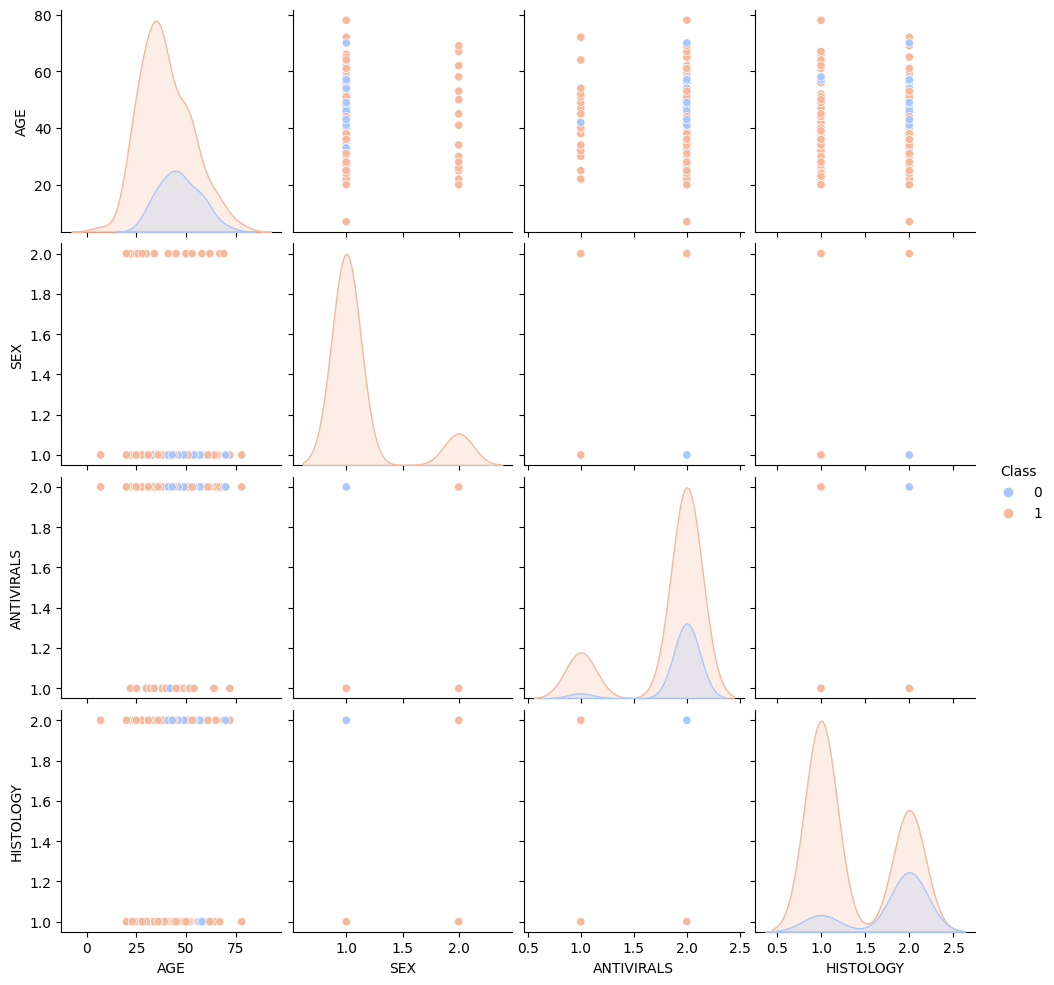

In [34]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Mengubah kelas target menjadi numerik jika perlu
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Plot pairplot untuk melihat distribusi fitur-fitur terhadap kelas
sns.pairplot(df, hue='Class', palette='coolwarm')
plt.show()

KNN (K-Nearest Neighbors)
Konsep:
KNN adalah algoritma klasifikasi yang mengklasifikasikan titik data baru berdasarkan jarak terdekat ke titik data lain yang ada di training set. Algoritma ini bekerja dengan mencari k tetangga terdekat dari titik data baru dan memprediksi kelas berdasarkan mayoritas kelas dari tetangga-tetangga ini.

Cara Kerja:

1. Menghitung Jarak: Hitung jarak antara titik data baru dan semua titik data di training set. Jarak yang umum digunakan adalah Euclidean distance.
2. Menentukan Tetangga Terdekat: Pilih k titik data dengan jarak terdekat.
3. Voting Mayoritas: Prediksi kelas dari titik data baru berdasarkan mayoritas kelas dari k tetangga terdekat.

Naive Bayes
Konsep:
Naive Bayes adalah algoritma klasifikasi yang didasarkan pada Teorema Bayes dengan asumsi bahwa setiap fitur bersifat independen satu sama lain. Meskipun asumsi ini jarang berlaku di dunia nyata, Naive Bayes sering memberikan hasil yang baik.

Cara Kerja:

1. Menghitung Probabilitas Prior: Menghitung probabilitas dari setiap kelas berdasarkan distribusi di data training.
2. Menghitung Probabilitas Likelihood: Menghitung probabilitas setiap fitur diberikan kelas tertentu.
3. Menggunakan Teorema Bayes: Kombinasikan probabilitas prior dan likelihood untuk menghitung probabilitas posterior dari setiap kelas.
4. Prediksi: Pilih kelas dengan probabilitas tertinggi sebagai prediksi.

Kesimpulan

KNN: KNN menggunakan jarak untuk menentukan kelas berdasarkan tetangga terdekat. Ini bekerja dengan baik pada data yang memiliki distribusi yang jelas dan tidak banyak fitur.

Naive Bayes: Naive Bayes menggunakan probabilitas dan asumsi independensi fitur untuk membuat prediksi. Ini bekerja dengan baik pada data dengan banyak fitur dan distribusi yang sederhana.

### Pada hasil pengujian manakah yang paling baik antara KNN dengan Naive Bayes pada dataset ini?

Untuk menentukan model yang terbaik, kita dapat membandingkan akurasi dan presisi dari kedua model

In [18]:
import pandas as pd

# Membuat dataframe untuk perbandingan hasil
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision'],
    'KNN': [accuracy_knn, precision_knn],
    'Naive Bayes': [accuracy_nb, precision_nb]
})

print("\nPerbandingan Hasil:")
print(results)

# Menentukan model terbaik berdasarkan akurasi dan presisi
best_accuracy_model = 'KNN' if accuracy_knn > accuracy_nb else 'Naive Bayes'
best_precision_model = 'KNN' if precision_knn > precision_nb else 'Naive Bayes'

print(f"\nModel dengan akurasi terbaik: {best_accuracy_model}")
print(f"Model dengan presisi terbaik: {best_precision_model}")


Perbandingan Hasil:
      Metric     KNN  Naive Bayes
0   Accuracy  0.8750     0.812500
1  Precision  0.9375     0.628205

Model dengan akurasi terbaik: KNN
Model dengan presisi terbaik: KNN


Perbandingan hasil:

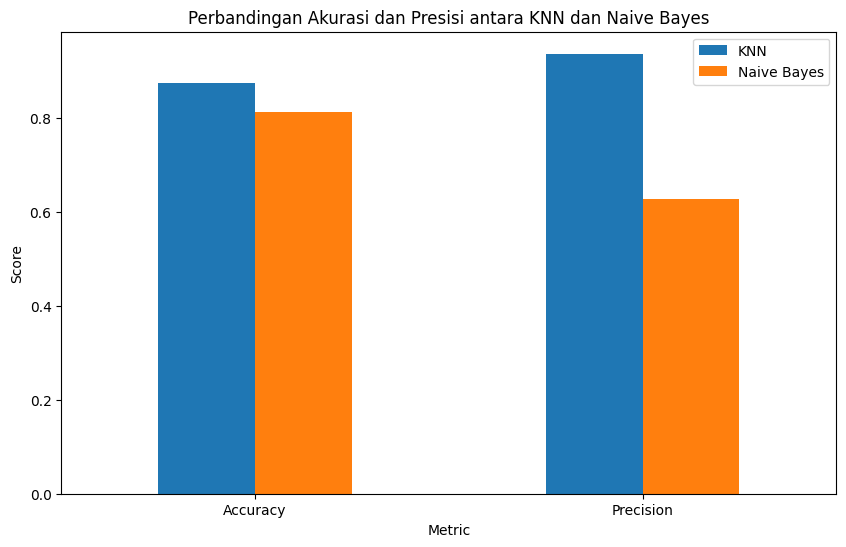

In [19]:
# Visualisasi perbandingan akurasi dan presisi
results.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Akurasi dan Presisi antara KNN dan Naive Bayes')
plt.ylabel('Score')

plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

Silahkan dilengkapi kode di atas. Pastikan tidak ada code error. Kemudian buat sebuah laporan yang menjelaskan
step by step dari notebook ini. Jangan lupa cantumkan Nama, NIM, dan Kelas. Deadline pengerjaan 1 minggu

Link pengumpulan : https://forms.gle/M7P91LwiZU6bqAEn6